# Predicting heart disease using machine learning

This notebook looks into using various Python based machine learning and data science libraries in an attempt to build a machine learning model which is capable of predicting wether someone has heart disease or not based on their medical attributes.

We're going to take the following approach:

1. Problem Definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

In a statement,
> Given clinical parameter about a patient, can we predict whether if the patient has heart disease or not

## 2. Data

The original data came from the Cleavland data from the UCI Machine Learning Repository. 

There is also a version available on Kaggle.

## 3. Evaluation

 > If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project
 
 ## 4. Features

This is where you'll get different information about each of the features in your data.
 
**Create data dictionary**

* age - age in years
* sex - (1 = male; 0 = female)
* cp - chest pain type
    1. Typical angina: chest pain related decrease blood supply to the heart
    2. Atypical angina: chest pain not related to heart
    3. Non-anginal pain: typically esophageal spasms (non heart related)
    4. Asymptomatic: chest pain not showing signs of disease
* trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
* chol - serum cholestoral in mg/dl
* serum = LDL + HDL + .2 * triglycerides above 200 is cause for concern
* fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) '>126' mg/dL signals diabetes
* restecg - resting electrocardiographic results
    1. Nothing to note
    2. ST-T Wave abnormality can range from mild symptoms to severe problems signals non-normal heart beat
    3. Possible or definite left ventricular hypertrophy Enlarged heart's main pumping chamber
* thalach - maximum heart rate achieved
* exang - exercise induced angina (1 = yes; 0 = no)
* oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
* slope - the slope of the peak exercise ST segment
    1. Upsloping: better heart rate with excercise (uncommon)
    2. Flatsloping: minimal change (typical healthy heart)
    3. Downslopins: signs of unhealthy heart
* ca - number of major vessels (0-3) colored by flourosopy colored vessel means the doctor can see the blood passing through the more blood movement the better (no clots)
* thal - thalium stress result
    1. 1,3: normal
    2. 6: fixed defect: used to be defect but ok now
    3. 7: reversable defect: no proper blood movement when excercising
* target - have disease or not (1=yes, 0=no) (= the predicted attribute)

## Preparing the tools

We're going to use pandas, matplotlib and numpy for data analysis and manipulation

In [76]:
# Import all the tools we need

# Regular EDA (Exploratory data analysis) and plotting libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# We want our plots to appear inside the notebook
%matplotlib inline 

# Models from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

## Load Data

In [77]:
df = pd.read_csv("heart-disease.csv")
df.shape

(303, 14)

## Data Exploration Analysis (EDA)

The goal here is to find out more about the data and become a subject matter expert on the dataset you're working with.

1. What questions are you trying to solve?
2. What kind of data do you have and how do we treat different types?
3. What's missing about the data and how to deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [78]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [79]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

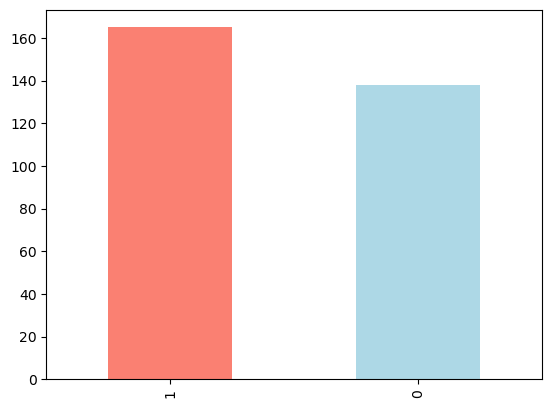

In [80]:
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [82]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [83]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to sex

In [84]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [85]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [86]:
# Compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


In [87]:
print(f'Based on existing data, chance of a female having heart disease is: {72/96*100:.2f}%')
print(f'Based on existing data, chance of a male having heart disease is: {93/207*100:.2f}%')
print(f'Based on existing data, chance of anyone having heart disease is: {(72+93)/303*100:.2f}%')

Based on existing data, chance of a female having heart disease is: 75.00%
Based on existing data, chance of a male having heart disease is: 44.93%
Based on existing data, chance of anyone having heart disease is: 54.46%


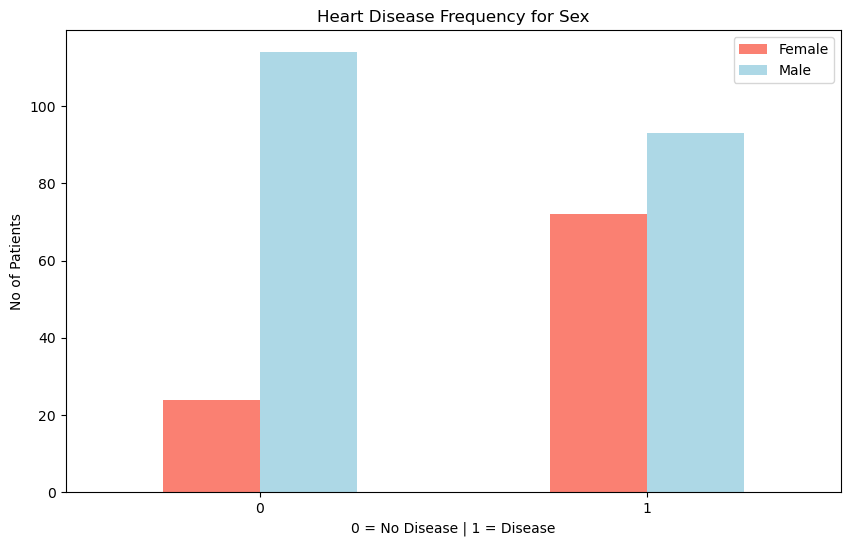

In [88]:
# Create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind="bar", figsize=(10, 6), color=["salmon", "lightblue"])

plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease | 1 = Disease")
plt.ylabel("No of Patients")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

### Age vs. Max Heart Rate for Heart Disease

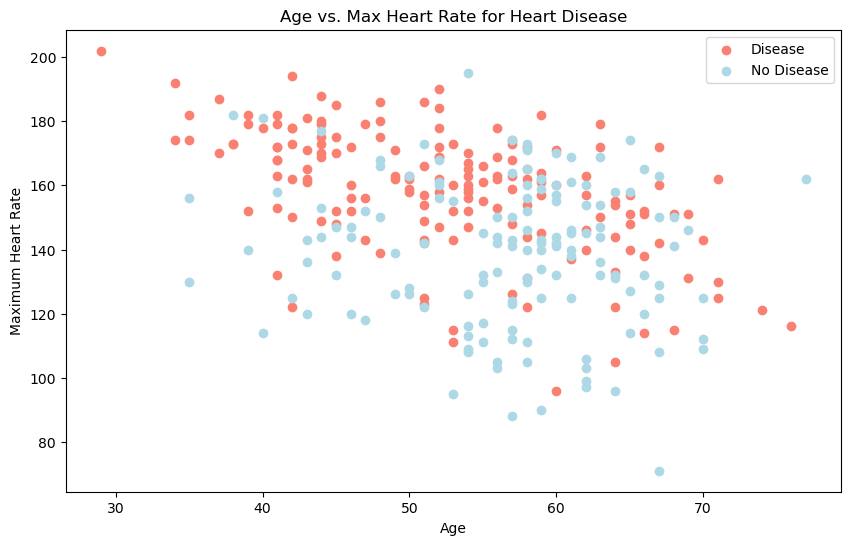

In [89]:
# Create another figure
plt.figure(figsize=(10, 6))

# Scatter with positive examples(With heart disease)
plt.scatter(df.age[df.target==1],df.thalach[df.target==1],  c="salmon")
plt.title("Age vs. Max Heart Rate for Heart Disease")
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.xticks(rotation=0);

# Scatter with negative examples (Without heart disease)
plt.scatter(df.age[df.target==0], df.thalach[df.target==0], c="lightblue");

plt.legend(["Disease", "No Disease"])

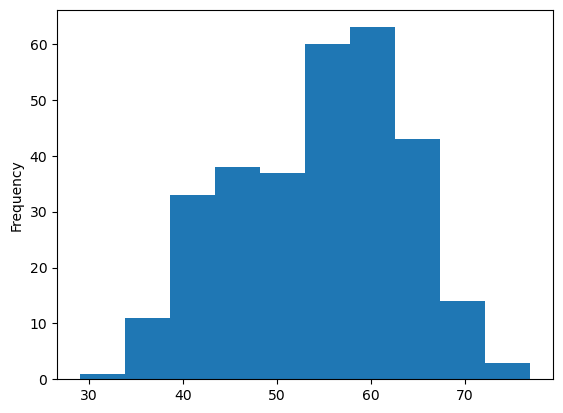

In [90]:
# Check the distribution of the age with a histogram
df.age.plot.hist();

## Heart Disease Frequency per Chest Pain Type 

* cp - chest pain type
    0. Typical angina: chest pain related decrease blood supply to the heart
    1. Atypical angina: chest pain not related to heart
    2. Non-anginal pain: typically esophageal spasms (non heart related)
    3. Asymptomatic: chest pain not showing signs of disease


In [91]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


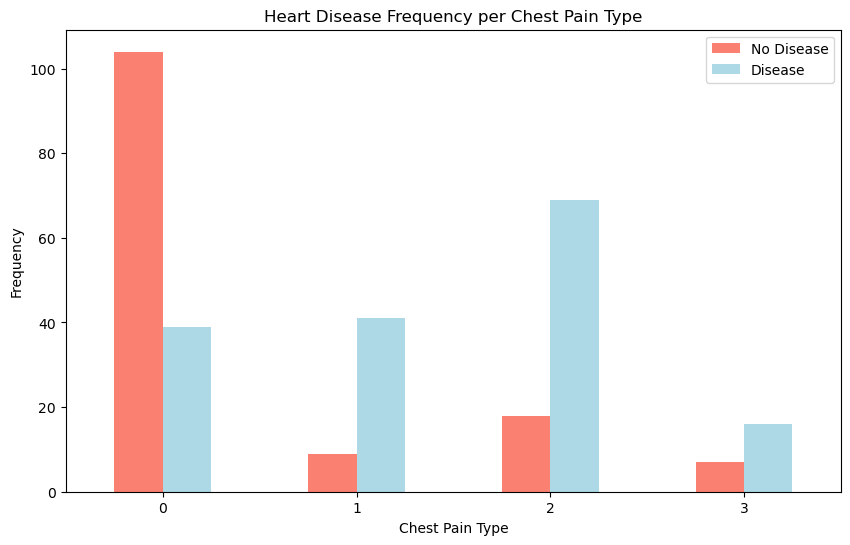

In [92]:
# Make the crosstab more visual
pd.crosstab(df.cp, df.target).plot(kind="bar", figsize=(10, 6), color=["salmon", "lightblue"])
plt.title("Heart Disease Frequency per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Frequency")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

In [93]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [94]:
# Building a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


<Axes: >

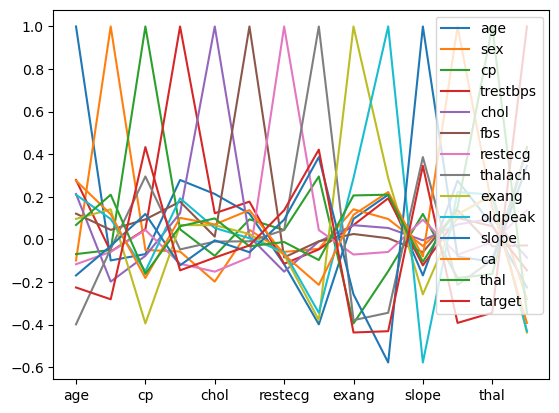

In [95]:
df.corr().plot() # LOL

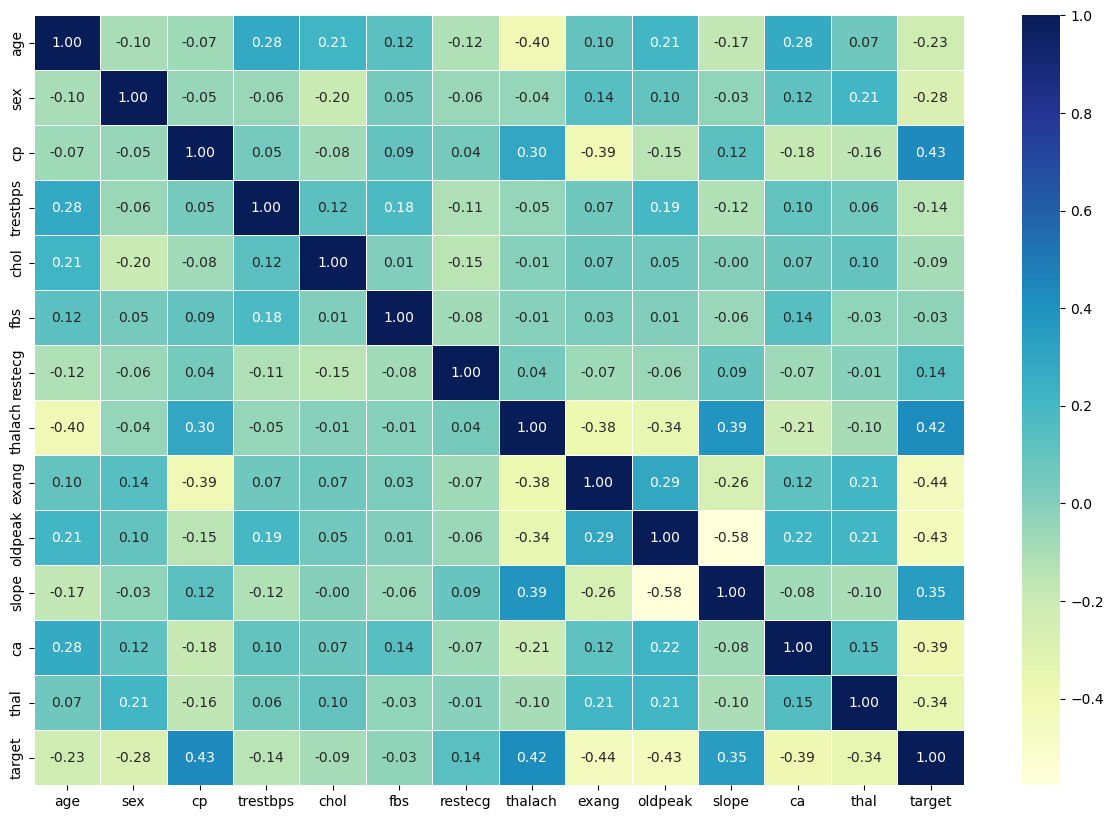

In [96]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt=".2f", cmap="YlGnBu")

**A higher positive value means a higher likelyhood of a positive correlation**
**and a higher negative value means a higher likelyhood of a negative correlation**

<Axes: xlabel='exang'>

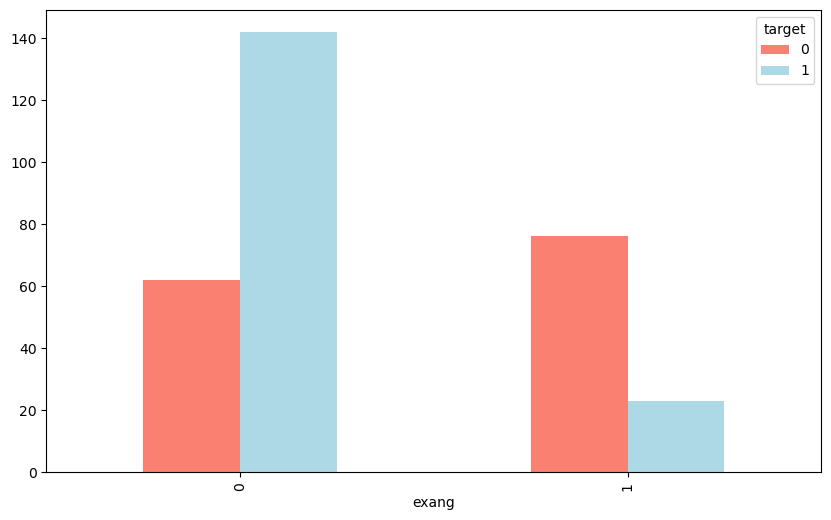

In [97]:
# Let's plot exang

pd.crosstab(df.exang, df.target).plot(kind="bar", figsize=(10, 6), color=["salmon", "lightblue"])

# 5. Modelling

In [98]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [99]:
# Split data into X & y
X = df.drop("target", axis=1)
y = df["target"]

In [100]:
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [101]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [102]:
y_train

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

Now've got our data into trianing and test sets, it's time to build a machine learning model

We'll train it on the training set (Find & Learn Patterns)

And we'll test it on the test set (Use Patterns to predict)

We're going to try 3 different machine learning models:

1. RandomForestClassifiers
2. LogisticRegression - A model used for classification rather than regression
3.  K-Nearest Neighbors

In [111]:
models = {
    "Random Forest Classifier": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier()
}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates machine learning models.
    models: A dict of differnet  Scikit-Learn Machine Learning Models
    X_train: Training Data
    X_test: Testing Data
    y_train: training labels
    y_test: test labels
    """
    # Set up random seed
    np.random.seed(42)
    # Create a dictionary to keep model scores
    model_scores = {}
    # Loop through models 
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [114]:
model_results = fit_and_score(models, X_train, X_test, y_train, y_test)
model_results

C:\Users\krish\Desktop\heart_disease_project\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Random Forest Classifier': 0.8360655737704918,
 'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344}

### Model Comparison

<Axes: >

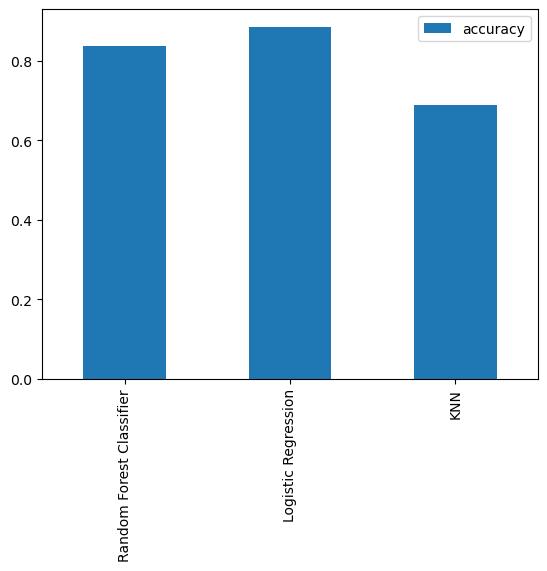

In [123]:
model_compare = pd.DataFrame(model_results, index=["accuracy"])
model_compare.T.plot.bar()

Now we've got a baseline model... and we know a model's first predictions aren't always what we should base our next steps off. What should we do?

Let's look at the following
* Hyperparameter tuning
* Feature importance
* Confusion Matrix
* Precision
* Recall
* Classification report
* ROC Curve
* AUC Curve

### Hyperparameter tuning (By Hand)

In [126]:
# Let's tune KNN
train_scores = []
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update training scores list
    train_scores.append(knn.score(X_train, y_train))
    
    # Update test scores list
    test_scores.append(knn.score(X_test, y_test))

In [130]:
train_scores, np.max(train_scores)

([1.0,
  0.8099173553719008,
  0.7727272727272727,
  0.743801652892562,
  0.7603305785123967,
  0.7520661157024794,
  0.743801652892562,
  0.7231404958677686,
  0.71900826446281,
  0.6942148760330579,
  0.7272727272727273,
  0.6983471074380165,
  0.6900826446280992,
  0.6942148760330579,
  0.6859504132231405,
  0.6735537190082644,
  0.6859504132231405,
  0.6652892561983471,
  0.6818181818181818,
  0.6694214876033058],
 1.0)

In [136]:
test_scores, np.max(test_scores)

([0.6229508196721312,
  0.639344262295082,
  0.6557377049180327,
  0.6721311475409836,
  0.6885245901639344,
  0.7213114754098361,
  0.7049180327868853,
  0.6885245901639344,
  0.6885245901639344,
  0.7049180327868853,
  0.7540983606557377,
  0.7377049180327869,
  0.7377049180327869,
  0.7377049180327869,
  0.6885245901639344,
  0.7213114754098361,
  0.6885245901639344,
  0.6885245901639344,
  0.7049180327868853,
  0.6557377049180327],
 0.7540983606557377)

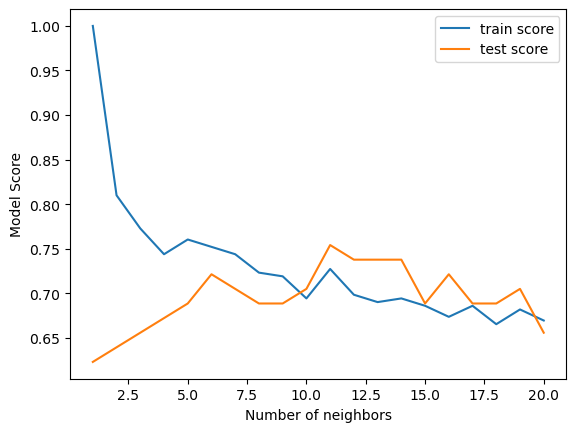

In [142]:
plt.plot(neighbors, train_scores, label="train score")
plt.plot(neighbors, test_scores, label="test score")
plt.xlabel("Number of neighbors")
plt.ylabel("Model Score")
plt.legend()

## Hyperparameter tuning with RandomizedSearchCV

We're going to tune:
* LogisticRegression()
* RandomForestClassifier()
... using RandomizedSearchCV

In [152]:
# Create a hyperparameter grid for logistic regression

log_reg_grid = {
    "C": np.logspace(-4, 4, 20),
    "solver": ["liblinear"]
}

# Create hyperparameter grid for RandomForestClassifier
rf_grid = {
    "n_estimators": np.arange(10, 1000, 50),
    "max_depth": [None, 3, 5, 10],
    "min_samples_split": np.arange(2, 20, 2),
    "min_samples_leaf": np.arange(1, 20, 2)
}

Now we've got hyperparameter grids setup for each of our models, let's tune them using RandomSearchCV

In [153]:
# Tune LogisticRegression

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True
                               )

# Fit random hyperparameter search model for logisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [154]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [155]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

Now we've tuned LogisticRegression, let's do the same for RandomForestClassifier()

In [157]:
# Setup Random Seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           n_iter=20,
                           cv=5,
                           verbose=True
                          )
# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [158]:
# Find the best hyperparameters
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [159]:
rs_rf.score(X_test, y_test)

0.8688524590163934

1. by hand
2. RandomizedSearchCV
3. GridSearchCV

## Hyperparameters tuning with GridSearchCV

Since our logistic regression model provides the best scores so far, we'll try and improve them again with using GridSearchCV


In [161]:
# Different hyperparameters grid for our LogisticRegression()
log_reg_grid = {
    "C": np.logspace(-4, 4, 30),
    "solver": ["liblinear"]
}

# Setup grid hyperparameter search for Logistic Regression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True
                         )

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [162]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [163]:
gs_log_reg.score(X_test, y_test)

0.8852459016393442

## Evaluate our tuned machine learning classifier, beyond accuracy

* ROC Curve and AUC score
* Confusion Matric
* Classification Report
* Precision
* Recall
* F1-score

... and it would be great if cross validation was used where possible.

To make comparisons and evaluate our trained model, first we need to make predictions.

In [167]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)

In [169]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

In [170]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [181]:
# Import ROC Curve function from the metrics and calculate AUC metric
# from sklearn.metrics import roc_curve
# from sklearn.metrics import auc
# fpr, tpr, threshold = roc_curve(y_test, y_preds)
# roc_auc = auc(fpr, tpr)

In [182]:
# display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='gs_log_rs')
# display.plot()

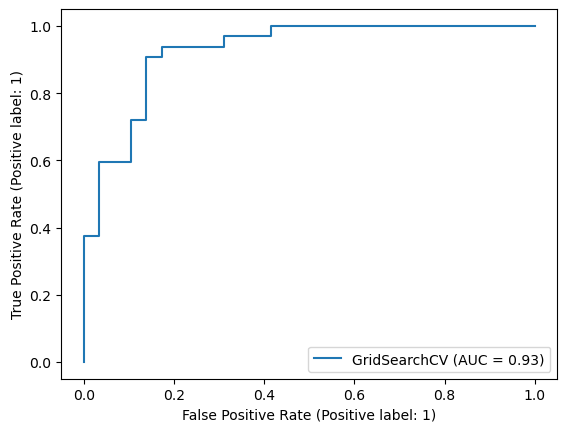

In [183]:
RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test);

In [184]:
# Confusion Matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


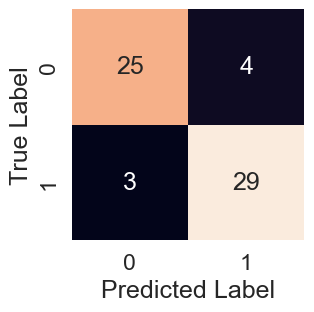

In [187]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Pass test & predict labels & Plot a nice looking confusion matrix using seaborns heatmap
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False
                    )
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")

plot_conf_mat(y_test, y_preds)

Let's get a classification report as well as a cross-validatied precision and f1-score

In [201]:
class_rep = classification_report(y_test, y_preds, output_dict=True)
df = pd.DataFrame(class_rep).T
df

,precision,recall,f1-score,support
0,0.892857,0.862069,0.877193,29.000000
1,0.878788,0.906250,0.892308,32.000000
accuracy,0.885246,0.885246,0.885246,0.885246
macro avg,0.885823,0.884159,0.884750,61.000000
weighted avg,0.885477,0.885246,0.885122,61.000000


### Calculate evaluation metrics using cross-validation

We're going to calculate precision, recall and f1-score of our model using cross-validation and to do so we're going to use `cross_val_score()`.

In [202]:
# Check best hyperarameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [204]:
clf = LogisticRegression(C=0.20433597178569418, solver="liblinear")

In [224]:
# Cross validated accuracy
cv_acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
cv_acc = cv_acc.mean()

In [225]:
# Cross validated precision
cv_pre = cross_val_score(clf, X, y, cv=5, scoring="precision")
cv_pre = cv_pre.mean()

In [226]:
# Cross validated recall
cv_rec = cross_val_score(clf, X, y, cv=5, scoring="recall")
cv_rec = cv_rec.mean()

In [227]:
# Cross validated recall
cv_f1 = cross_val_score(clf, X, y, cv=5, scoring="f1")
cv_f1 = cv_f1.mean()

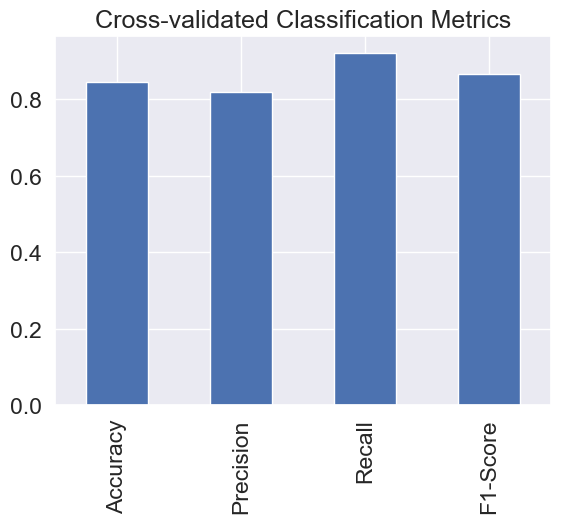

In [229]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_pre,
                           "Recall": cv_rec,
                           "F1-Score": cv_f1},
                           index=[0])                          
cv_metrics.T.plot.bar(title="Cross-validated Classification Metrics", legend=False);

### Feature Importance

Feature importance is another way of asking "which features contributed most to the outcomes of the model and how did they contribute?"

Finding feature importance is different for each machine learning model


In [231]:
df = pd.read_csv("heart-disease.csv")

Let's find the feature importance for our LogisticRegression Model ...

In [234]:
# Fit an instance of LogisticRegression
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [235]:
clf = LogisticRegression(C=0.20433597178569418, solver="liblinear")

clf.fit(X_train, y_train);

In [236]:
# Check coef_
clf.coef_

array([[ 0.00316728, -0.86044651,  0.66067041, -0.01156993, -0.00166374,
         0.04386107,  0.31275847,  0.02459361, -0.6041308 , -0.56862804,
         0.45051628, -0.63609897, -0.67663373]])

In [237]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [240]:
# Match the features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0031672801993431563,
 'sex': -0.8604465072345515,
 'cp': 0.6606704082033799,
 'trestbps': -0.01156993168080875,
 'chol': -0.001663744504776871,
 'fbs': 0.043861071652469864,
 'restecg': 0.31275846822418324,
 'thalach': 0.024593613737779126,
 'exang': -0.6041308000615746,
 'oldpeak': -0.5686280368396555,
 'slope': 0.4505162797258308,
 'ca': -0.6360989676086223,
 'thal': -0.6766337263029825}

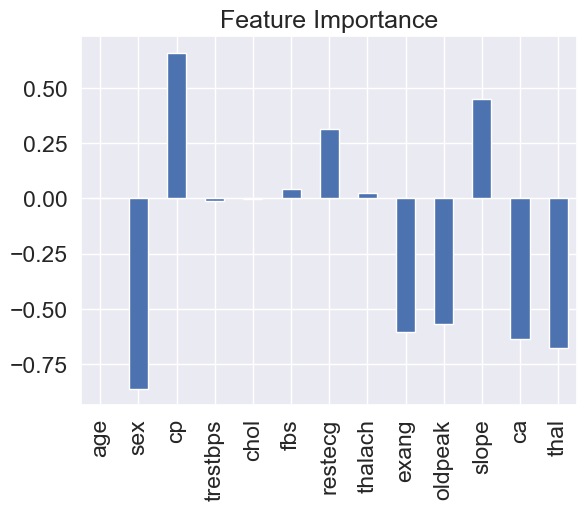

In [242]:
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

<Axes: xlabel='sex'>

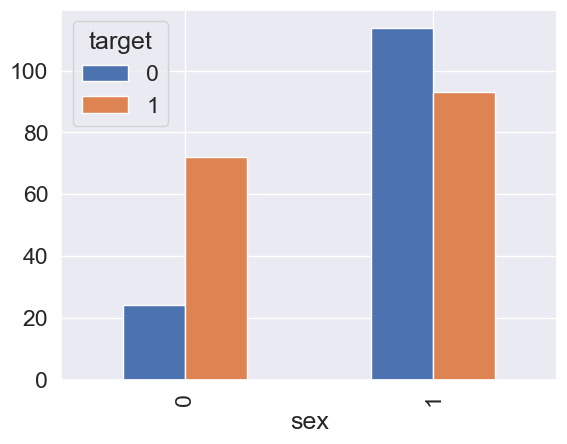

In [244]:
pd.crosstab(df["sex"], df["target"]).plot(kind="bar")

In [245]:
pd.crosstab(df["slope"], df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


## 6. Experimentation

The secret is we've been experimeting continuously. Yay, congratulations!

If you haven't hit your evaluation metric yet... ask yourself. 

* Could you collect more data?
* Could you try a better model? ( Like CatBoost or XgBoost )
* Could you improve the current models? (Beyond what we've done so far)

If you've hit your evaluation metric, then export your model and send it to your client! The question is how?